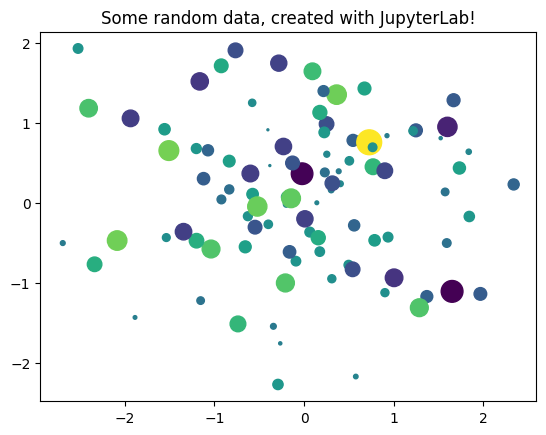

In [14]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*100)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

In [3]:
a = [1, 2, 3]
a

[1, 2, 3]